In [4]:
import pandas as pd
import numpy as np


 2 - Load the dataset

In [5]:
#Load the dataset.

df= pd.read_csv('Churn_Modelling.csv')

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
Churn_Modelling_df=pd.read_csv('/content/Churn_Modelling.csv')
print(Churn_Modelling_df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [8]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
from pandas.core.indexes.api import InvalidIndexError
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3- Visualizations - (i)Univariate Analysis



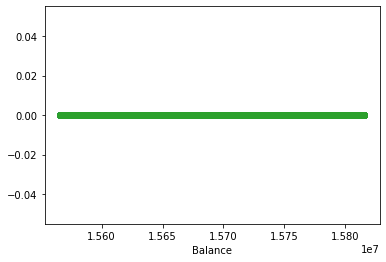

In [12]:
df_France=df.loc[df['Geography']=='France']
df_Germany=df.loc[df['Exited']=='Germany']
df_Spain=df.loc[df['Geography']=='Spain']
plt.plot(df_France['CustomerId'],np.zeros_like(df_France['CustomerId']),'o')
plt.plot(df_Germany['CustomerId'],np.zeros_like(df_Germany['CustomerId']),'o')
plt.plot(df_Spain['CustomerId'],np.zeros_like(df_Spain['CustomerId']),'o')
plt.xlabel('Balance')
plt.show()

3(ii) - Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


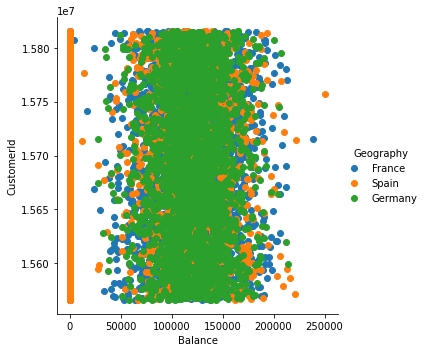

In [13]:
# Bivariate Analysis
sns.FacetGrid(df,hue="Geography",size=5).map(plt.scatter,"Balance","CustomerId").add_legend()
plt.show()

3(iii) - Multi - Variate Analysis

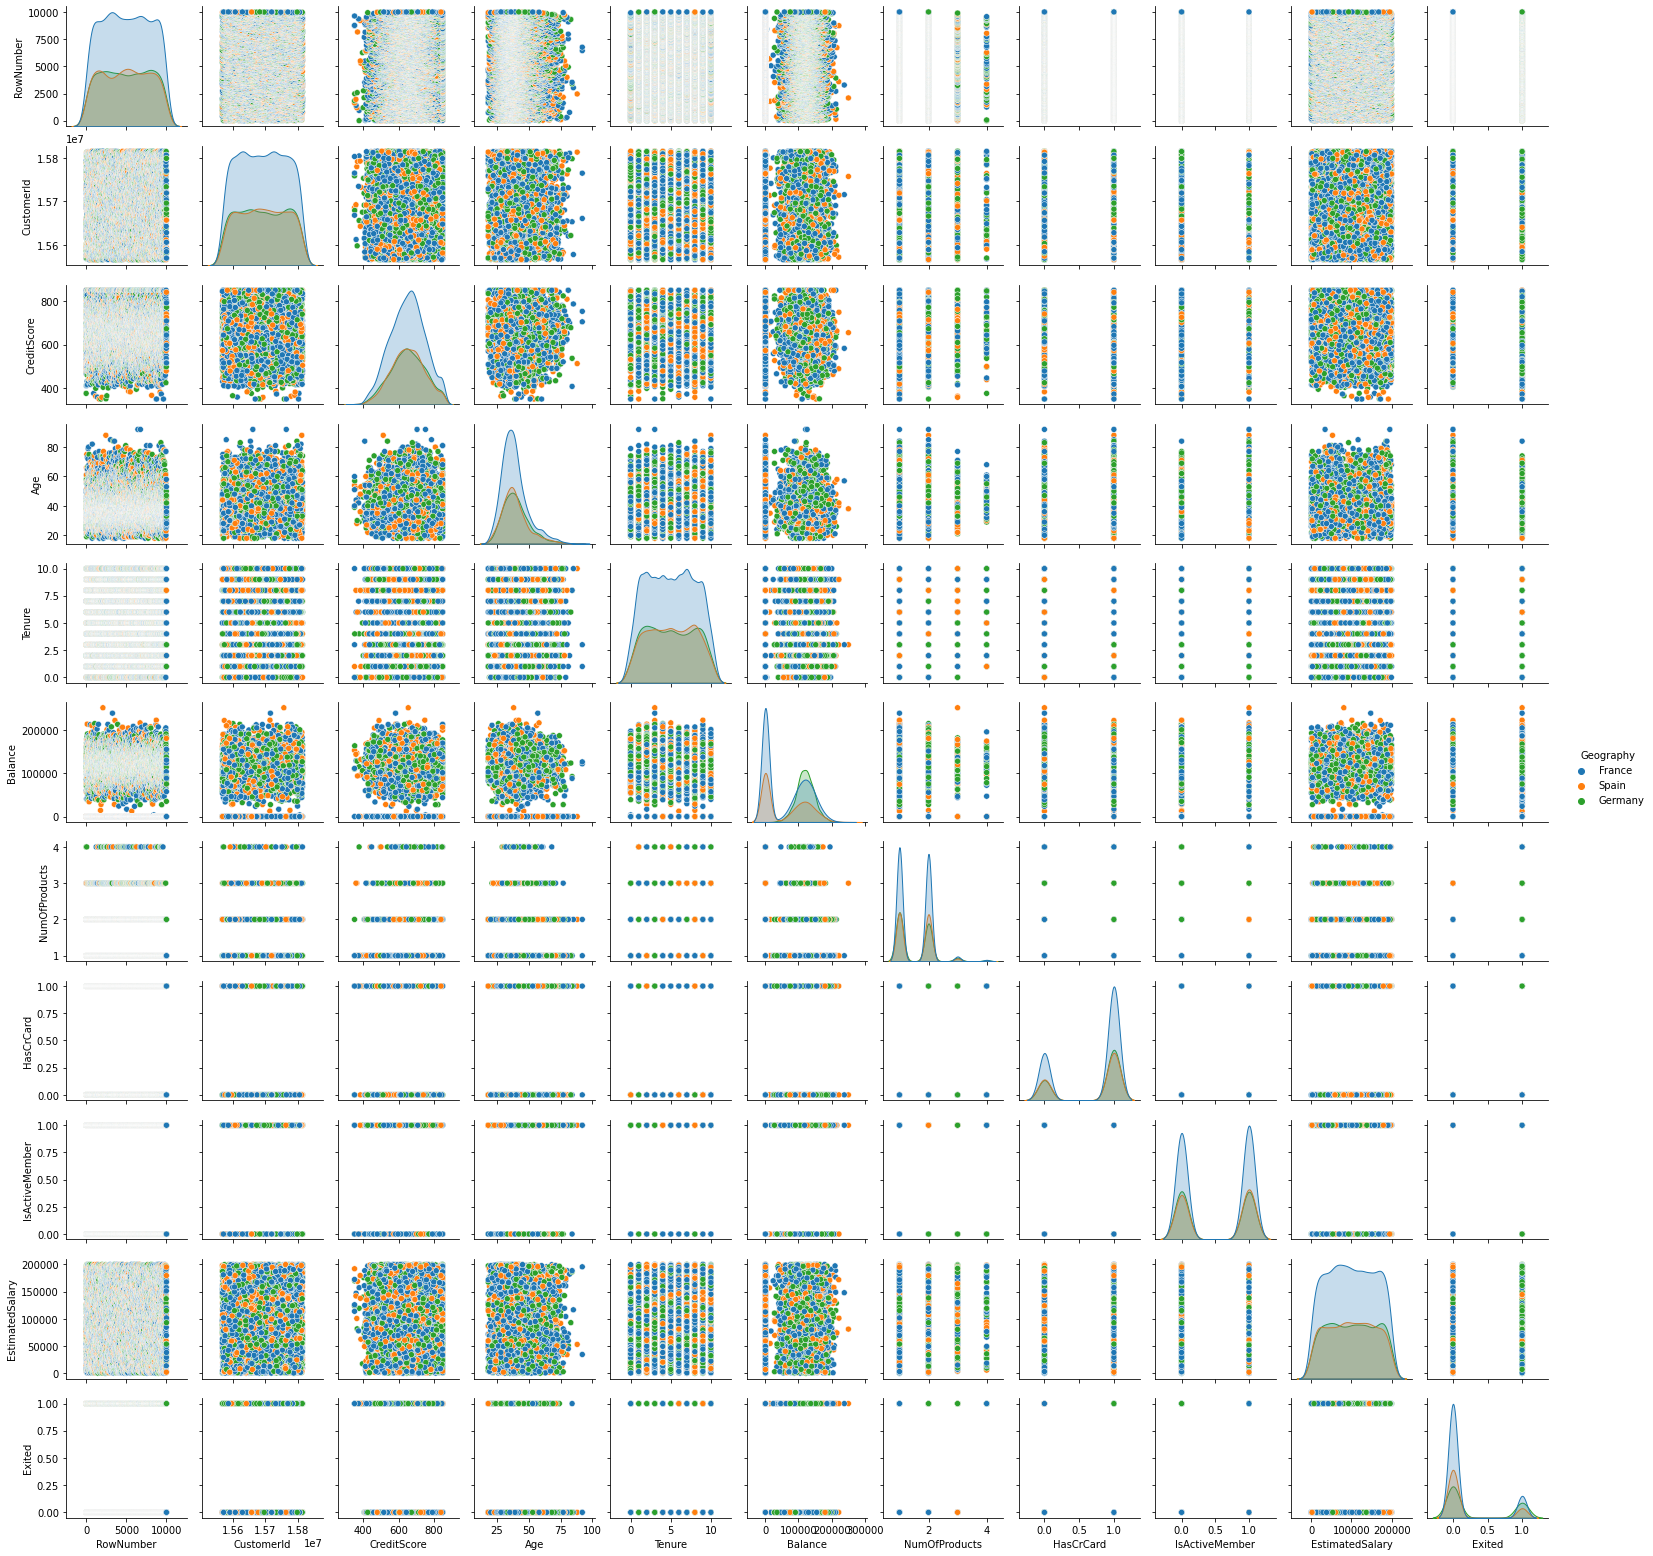

In [14]:
# Multivariate Analysis
sns.pairplot(df, hue="Geography", height=2)

4 - Perform descriptive statistics on the datase

In [16]:
# Descriptive Statistics
url = "/content/Churn_Modelling.csv"
names = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts']
df = pd.read_csv(url, names=names)
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = df.describe()
print(description)

       CustomerId Surname CreditScore Geography Gender    Age Tenure   Balance NumOfProducts
count       10001   10001       10001     10001  10001  10001  10001     10001         10001
unique          3      71          12      6383      5      3      3     10000             3
top          Male      37           2         0      1      1      1  24924.92             0
freq         5457     478        1048      3617   5084   7055   5151         2          7963


5. Handle the Missing values.


In [17]:
# Handling the missing datas
df = pd.read_csv("/content/Churn_Modelling.csv", header=None)
df.head

<bound method NDFrame.head of               0           1          2            3          4       5    6       7          8   \
0      RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  Tenure    Balance   
1              1    15634602   Hargrave          619     France  Female   42       2          0   
2              2    15647311       Hill          608      Spain  Female   41       1   83807.86   
3              3    15619304       Onio          502     France  Female   42       8   159660.8   
4              4    15701354       Boni          699     France  Female   39       1          0   
...          ...         ...        ...          ...        ...     ...  ...     ...        ...   
9996        9996    15606229   Obijiaku          771     France    Male   39       5          0   
9997        9997    15569892  Johnstone          516     France    Male   35      10   57369.61   
9998        9998    15584532        Liu          709     France  Female   36   

In [18]:
print(df.shape)
df.dropna(inplace=True)

(10001, 14)


In [19]:
df.fillna(df.mean(), inplace=True)
df.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
4517,4517,15812210,Yashina,497,Germany,Female,32,8,111537.23,4,1,1,9497.99,1
8300,8300,15792473,Reilly,598,Germany,Female,50,5,88379.81,3,0,1,64157.24,1
516,516,15746902,Belstead,793,Spain,Male,38,9,0,2,1,0,88225.02,0
3564,3564,15687270,Iroawuchi,491,Spain,Female,61,8,0,2,0,1,139861.53,0
465,465,15613786,Ogbonnaya,818,Spain,Male,26,4,0,2,1,1,167036.94,0
3589,3589,15571958,McIntosh,489,Spain,Male,40,3,221532.8,1,1,0,171867.08,0
3660,3660,15664668,Zarate,534,France,Female,42,9,144801.97,1,0,1,12483.39,1
8652,8652,15760450,Rutherford,512,France,Male,43,1,0,2,1,1,52471.36,0
6027,6027,15718843,Maslova,769,Spain,Male,41,1,72509.91,1,1,0,25723.73,0
5844,5844,15813327,Romani,710,France,Male,21,4,109130.96,2,1,1,56191.99,0


In [25]:
df.fillna(df.mode(), inplace=True)
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
6241,6241,15626507,Chukwubuikem,558,France,Male,27,1,152283.39,1,1,0,183271.15,0
9026,9026,15574743,Chiu,577,Spain,Male,29,2,0,1,1,1,168924.41,0
3720,3720,15577999,Sleeman,850,France,Female,62,1,124678.35,1,1,0,70916,1
5854,5854,15765300,L?,596,Germany,Male,40,5,62389.03,3,1,0,148623.43,1
9851,9851,15626012,Obidimkpa,459,France,Male,26,4,149879.66,1,0,0,50016.17,0
6809,6809,15720134,Reynolds,709,Germany,Male,30,9,115479.48,2,1,1,134732.99,0
9744,9744,15609643,Furneaux,752,Germany,Male,32,9,115587.49,2,0,1,101677.46,0
3131,3131,15813113,Chang,795,Spain,Female,56,5,0,1,1,0,35418.69,1
7335,7335,15759133,Vaguine,616,France,Male,18,6,0,2,1,1,27308.58,0
2410,2410,15735522,Boulger,654,Germany,Male,37,2,145610.07,2,0,0,186300.59,0


In [35]:

# import modules
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
value = df.values

imputer = SimpleImputer(missing_values=nan,strategy='most_frequent')

# transform the dataset
transformed_values = imputer.fit_transform(value)

print("Missing:", (transformed_values).sum())


Missing: RowNumberCustomerIdSurnameCreditScoreGeographyGenderAgeTenureBalanceNumOfProductsHasCrCardIsActiveMemberEstimatedSalaryExited115634602Hargrave619FranceFemale4220111101348.881215647311Hill608SpainFemale41183807.86101112542.580315619304Onio502FranceFemale428159660.8310113931.571415701354Boni699FranceFemale391020093826.630515737888Mitchell850SpainFemale432125510.8211179084.10615574012Chu645SpainMale448113755.78210149756.711715592531Bartlett822FranceMale507021110062.80815656148Obinna376GermanyFemale294115046.74410119346.881915792365He501FranceMale444142051.0720174940.501015592389H?684FranceMale272134603.8811171725.7301115767821Bearce528FranceMale316102016.7220080181.1201215737173Andrews497SpainMale243021076390.0101315632264Kay476FranceFemale3410021026260.9801415691483Chin549FranceFemale2550200190857.7901515600882Scott635SpainFemale357021165951.6501615643966Goforth616GermanyMale453143129.4120164327.2601715737452Romeo653GermanyMale581132602.881105097.6711815788218Henderson549SpainFe

In [40]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1430,1431,15703143,Tuan,820,France,Female,29,3,82344.84,1,0,1,115985.38,0
4415,4416,15575955,Lujan,764,France,Female,24,0,0.00,2,1,0,88724.49,0
5130,5131,15631721,Millar,691,Germany,Male,38,9,163965.69,2,0,1,103511.26,0
3550,3551,15648455,Kung,647,Germany,Male,51,4,131156.76,1,1,0,29883.63,0
9559,9560,15761706,Y?an,705,Spain,Female,39,8,144102.32,1,1,1,11682.36,0


6. Find the outliers and replace the outliers

In [41]:
#Finding the Outliers
df[(df['Age'] > 8.80) | (df['Tenure'] < 5.11)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


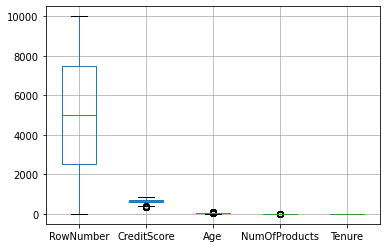

In [53]:
#Detecting Outliers
Churn = pd.read_csv('/content/Churn_Modelling.csv')
names = ['RowNumber', 'CreditScore', 'Age', 'NumOfProducts', 'Tenure']
Churn.boxplot(names)

In [54]:
#Removal of Outliers
Churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [59]:
# Apply Capping/Replacing
df['Age'] = np.where(df['Age'] >= 45,45,np.where(df['Age'] <= 10,10,df['Age']))



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


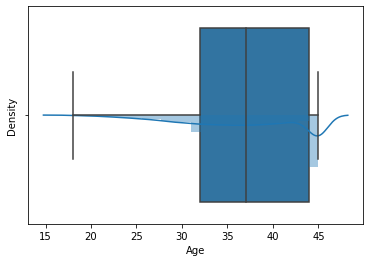

In [60]:
sns.distplot(df['Age'])
sns.boxplot(df['Age'])

7. Check for Categorical columns and perform encoding

In [61]:
#Categorical columns and perform encoding
headers = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts']

df = pd.read_csv("/content/Churn_Modelling.csv",
                  header=None, names=headers, na_values="?" )
df.head()

,,,,,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts
RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0


In [62]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,,,,,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts
RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0


In [66]:
# Find and Replace
obj_df = obj_df.fillna({"CreditScore": "580"})
obj_df["CreditScore"] = obj_df["CreditScore"].astype('category')
obj_df.dtypes


CustomerId         object
Surname            object
CreditScore      category
Geography          object
Gender             object
Age                object
Tenure             object
Balance            object
NumOfProducts      object
dtype: object

In [67]:
#Label Encoding
obj_df["CreditScore_cat"] = obj_df["CreditScore"].cat.codes
obj_df.head()

,,,,,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditScore_cat
RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,11
1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1,3
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1,9
4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0,1


In [68]:
#One Hot Encoding
pd.get_dummies(obj_df, columns=["CustomerId"]).head()

,,,,,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditScore_cat,CustomerId_Female,CustomerId_Gender,CustomerId_Male
RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,11,0,1,0
1,15634602,Hargrave,619,France,42,2,0,1,1,1,101348.88,1,3,1,0,0
2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,1,0,0
3,15619304,Onio,502,France,42,8,159660.8,3,1,0,113931.57,1,9,1,0,0
4,15701354,Boni,699,France,39,1,0,2,0,0,93826.63,0,1,1,0,0


In [69]:
#Custom Binary Encoding
obj_df["NumOfProducts"].value_counts()

0         7963
1         2037
Exited       1
Name: NumOfProducts, dtype: int64

8. Split the data into dependent and independent variables.

In [70]:
#Split the data into dependent and independent variables.
fileopen = open("/content/Churn_Modelling.csv", "r")
fileread = fileopen.read()
print(fileread.splitlines())
fileopen.close()

['RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited', '1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1', '2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0', '3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1', '4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0', '5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0', '6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1', '7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0', '8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1', '9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0', '10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0', '11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0', '12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0', '13,15632264,Kay,476,France,Female,34,10,0,2,1,0,26260.98,0

In [76]:
df.count(0)

CustomerId       10001
Surname          10001
CreditScore      10001
Geography        10001
Gender           10001
Age              10001
Tenure           10001
Balance          10001
NumOfProducts    10001
dtype: int64

In [77]:
#Independent variable
X = df.iloc[:, :-1].values
print(X)

[['Gender' 'Age' 'Tenure' ... 'HasCrCard' 'IsActiveMember'
  'EstimatedSalary']
 ['Female' '42' '2' ... '1' '1' '101348.88']
 ['Female' '41' '1' ... '0' '1' '112542.58']
 ...
 ['Female' '36' '7' ... '0' '1' '42085.58']
 ['Male' '42' '3' ... '1' '0' '92888.52']
 ['Female' '28' '4' ... '1' '0' '38190.78']]


In [78]:
#Dependent variable
Y = df.iloc[:, -1].values
print(Y)

['Exited' '1' '0' ... '1' '1' '0']


9. Scale the independent variables

In [80]:
# Scale the independent variables
from sklearn.preprocessing import MinMaxScaler
pd_data = pd.DataFrame({
	"CreditScore": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
	"EstimatedSalary": [100, 300, 250, 120, 910, 345, 124, 1000, 289, 500]
})
scaler = MinMaxScaler()
pd_data[["ScaledPrice"]] = scaler.fit_transform(pd_data[["EstimatedSalary"]])
print(pd_data)


   CreditScore  EstimatedSalary  ScaledPrice
0            1              100        0.000
1            2              300        0.222
2            3              250        0.167
3            4              120        0.022
4            5              910        0.900
5            6              345        0.272
6            7              124        0.027
7            8             1000        1.000
8            9              289        0.210
9           10              500        0.444


In [83]:
df = df.sample(frac = 1)
df.shape

(10001, 9)

10. Split the data into training and testin

In [85]:
X = np.array(df.drop(["CreditScore"],1))
print("Shape of X:",X.shape)
print(X)

Shape of X: (10001, 8)
[['Male' '30' '108300.27' ... '1' '44384.57' '1']
 ['Male' '38' '71460.67' ... '1' '10074.05' '0']
 ['Female' '46' '0' ... '1' '56408.14' '0']
 ...
 ['Male' '68' '169445.4' ... '1' '186335.07' '0']
 ['Female' '32' '0' ... '0' '109681.29' '0']
 ['Female' '57' '175575.95' ... '0' '99061.75' '1']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [86]:
y = np.array(df["CreditScore"])
print("Shape of y:",y.shape)
print(y)

Shape of y: (10001,)
['4' '8' '3' ... '5' '2' '3']


In [87]:
print("Enter the splitting factor (i.e) ratio between train and test")
s_f = float(input())

Enter the splitting factor (i.e) ratio between train and test
8.0


In [88]:
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 10001
Total Number of rows in test: 0


In [89]:
#Before splitting:
print("X:")
print(X)
print("y:")
print(y)

X:
[['Male' '30' '108300.27' ... '1' '44384.57' '1']
 ['Male' '38' '71460.67' ... '1' '10074.05' '0']
 ['Female' '46' '0' ... '1' '56408.14' '0']
 ...
 ['Male' '68' '169445.4' ... '1' '186335.07' '0']
 ['Female' '32' '0' ... '0' '109681.29' '0']
 ['Female' '57' '175575.95' ... '0' '99061.75' '1']]
y:
['4' '8' '3' ... '5' '2' '3']


In [90]:
#After splitting:
print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)
print("\nX_test")
print(X_test)
print("\ny_test")
print(y_test)

X_train:
[['Male' '30' '108300.27' ... '1' '44384.57' '1']
 ['Male' '38' '71460.67' ... '1' '10074.05' '0']
 ['Female' '46' '0' ... '1' '56408.14' '0']
 ...
 ['Male' '68' '169445.4' ... '1' '186335.07' '0']
 ['Female' '32' '0' ... '0' '109681.29' '0']
 ['Female' '57' '175575.95' ... '0' '99061.75' '1']]

y_train:
['4' '8' '3' ... '5' '2' '3']

X_test
[]

y_test
[]
